In [1]:
#Install python libraries for reading nc4 (netCDF4) and plotting data on map
#(matplotlib,cartopy)
!pip install cartopy matplotlib netCDF4

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.7/11.7 MB 61.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.3/9.3 MB 69.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 53.5 MB/s eta 0:00:00


In [2]:
#Importing necessary python libraries
import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import cartopy.feature as cfeature
import matplotlib.colors
from netCDF4 import Dataset
from pylab import *


In [3]:
#Mount personal google drive to access PACE NO2 files
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
#Reading PACE NO2 file using netCDF4 library
filename = 'drive/MyDrive/PACE_NO2_Gridded_NAmerica_2024m0501.nc'

f = Dataset(filename,'r')

In [5]:
#Reading latitude/longitude and no2 from PACE NO2 file. Since we use the
#netCDF4 library, it will automatically mask fill values and perform
#any scaling based on metadata in nc4 file
lon = f['/navigation_data/longitude'][()]
lat = f['/navigation_data/latitude'][()]

pace_no2 = f['geophysical_data/nitrogen_dioxide_total_vertical_column'][()]

#Grabbing bounding lat/lons from the PACE NO2 file
min_lon = np.nanmin(lon)
max_lon = np.nanmax(lon)
min_lat = np.nanmin(lat)
max_lat = np.nanmax(lat)

/usr/local/lib/python3.11/dist-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/10m_cultural/ne_10m_admin_0_countries.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
/usr/local/lib/python3.11/dist-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/50m_physical/ne_50m_coastline.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


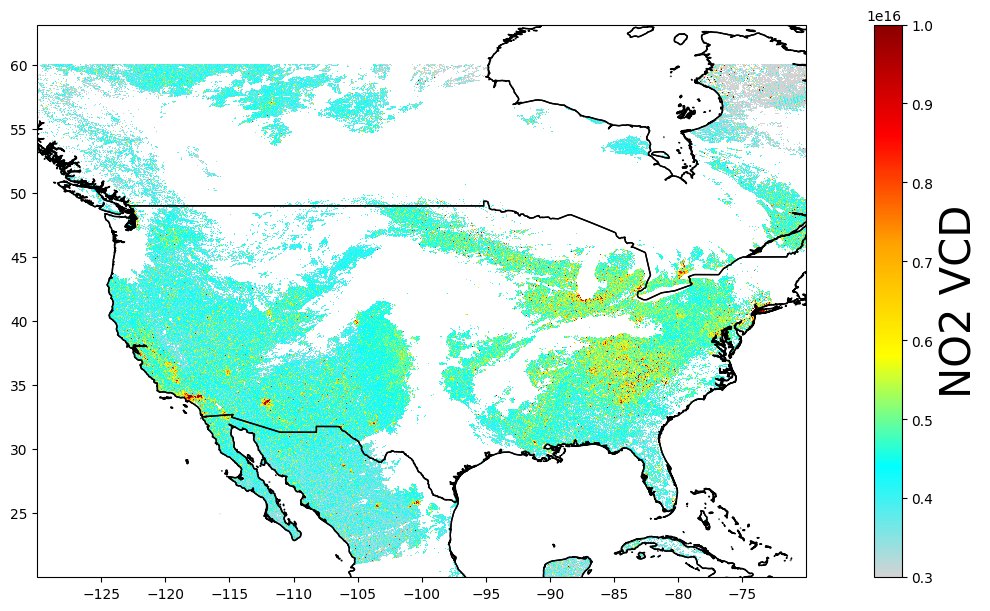

In [6]:
#Making a map using cartopy
fig, axes = plt.subplots(figsize=(14,6),subplot_kw=dict(projection=ccrs.PlateCarree()),constrained_layout=True)

#Putting lat/lon ticks, country and coastline boundaries on the map
axes.set_xticks(np.arange(-180,200,5))
axes.set_yticks(np.arange(-90,110,5))
countries = cfeature.NaturalEarthFeature(category='cultural',name='admin_0_countries',scale='10m',facecolor='none',edgecolor='k')
axes.add_feature(countries)
axes.coastlines(resolution='50m')

#Defining a custom colorbar for plotting NO2
cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ["lightgrey","cyan","yellow","orange","red","darkred"])
vmin=3e15
vmax=10e15
bounds = np.linspace(vmin,vmax,21)
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)

#Using imshow to map the 3-d PACE NO2 data to the map
im = axes.imshow(pace_no2.T,extent=[min_lon,max_lon,min_lat,max_lat],cmap=cmap,vmin=vmin,vmax=vmax,interpolation='nearest',origin='lower')

#Making a colorbar for the map
cb = fig.colorbar(im,fraction=0.025)
cb.set_label('NO2 VCD',fontsize=30)

#Setting the map boundaries to those in the PACE file
axes.set_extent([min_lon,max_lon,min_lat,max_lat])

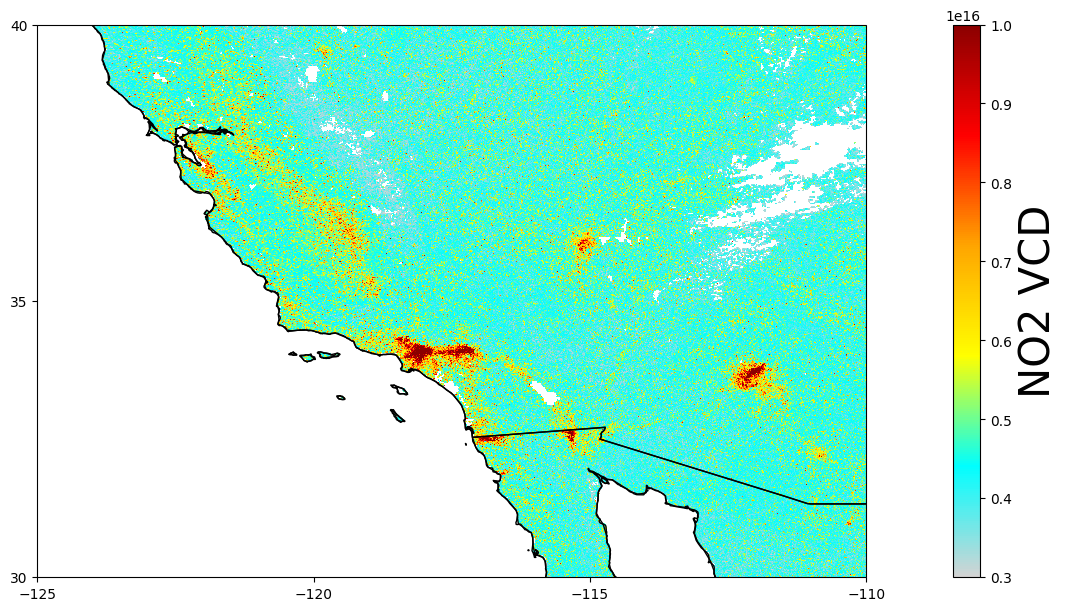

In [7]:
#Making a map using cartopy
fig, axes = plt.subplots(figsize=(14,6),subplot_kw=dict(projection=ccrs.PlateCarree()),constrained_layout=True)

#Putting lat/lon ticks, country and coastline boundaries on the map
axes.set_xticks(np.arange(-180,200,5))
axes.set_yticks(np.arange(-90,110,5))
countries = cfeature.NaturalEarthFeature(category='cultural',name='admin_0_countries',scale='10m',facecolor='none',edgecolor='k')
axes.add_feature(countries)
axes.coastlines(resolution='50m')

#Defining a custom colorbar for plotting NO2
cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ["lightgrey","cyan","yellow","orange","red","darkred"])
vmin=3e15
vmax=10e15
bounds = np.linspace(vmin,vmax,21)
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)

#Using imshow to map the 3-d PACE NO2 data to the map
im = axes.imshow(pace_no2.T,extent=[min_lon,max_lon,min_lat,max_lat],cmap=cmap,vmin=vmin,vmax=vmax,interpolation='nearest',origin='lower')

#Making a colorbar for the map
cb = fig.colorbar(im,fraction=0.025)
cb.set_label('NO2 VCD',fontsize=30)

#Setting the map boundaries to a region in SW U.S.
axes.set_extent([-125,-110,30,40])